## Frozen interactions beetween characters

Link do danych: https://petterhol.me/2019/07/19/frozen-weighted-network/

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

edges = [
    ("Troll King 2", "Men Hans", 2),
    ("Boy", "Man3", 1),
    ("Persis_Wife", "Persi", 2),
    ("Bulda", "Troll2", 1),
    ("Bulda", "Sven", 2),
    ("Bulda", "Trolls", 2),
    ("Bulda", "Anna", 5),
    ("Woman_Holding_Baby", "Elsa", 1),
    ("French_Dignitary", "Dock_Master", 3),
    ("Anna", "Queen", 1),
    ("Anna", "Crowd", 1),
    ("Anna", "Sven", 2),
    ("Anna", "Dukes_Guard2", 2),
    ("Anna", "Dukes_Guard1", 2),
    ("Spanish_Dignitary", "Hans", 6),
    ("Spanish_Dignitary", "Irish_Dignitary", 2),
    ("Woman", "Hans", 2),
    ("Kid_Troll3", "Anna", 2),
    ("Man2", "Man1", 3),
    ("Kai", "Duke", 3),
    ("Kai", "Crowd", 1),
    ("Kai", "Elsa", 1),
    ("Kai", "French_Dignitary", 2),
    ("Kai", "Anna", 13),
    ("Elsa", "Crowd", 2),
    ("Elsa", "Duke", 6),
    ("Elsa", "Queen", 2),
    ("Elsa", "Dukes_Guard2", 2),
    ("Elsa", "Dukes_Guard1", 2),
    ("Elsa", "Anna", 133),
    ("Troll2", "Kristoff", 7),
    ("Troll2", "Anna", 1),
    ("Troll3", "Kristoff", 5),
    ("Troll3", "Anna", 1),
    ("Sven", "Kristoff", 19),
    ("Troll1", "Kristoff", 5),
    ("Troll1", "Anna", 4),
    ("Troll4", "Anna", 2),
    ("Dukes_Guard1", "Dukes_Guard2", 2),
    ("Hans", "Duke", 18),
    ("Hans", "Horse", 1),
    ("Hans", "Crowd", 1),
    ("Hans", "Elsa", 24),
    ("Hans", "Guests", 1),
    ("Hans", "Irish_Dignitary", 2),
    ("Hans", "French_Dignitary", 5),
    ("Hans", "Anna", 123),
    ("Man_in_Crowd", "Elsa", 1),
    ("King", "Elsa", 10),
    ("King", "Grand_Pabbie", 6),
    ("King", "Anna", 2),
    ("Olaf", "Troll", 1),
    ("Olaf", "Kristoff", 29),
    ("Olaf", "Marshmallow", 1),
    ("Olaf", "Elsa", 10),
    ("Olaf", "Sven", 4),
    ("Olaf", "Anna", 68),
    ("Mother", "Boy", 3),
    ("Duke", "Spanish_Dignitary", 2),
    ("Duke", "Crowd", 2),
    ("Duke", "French_Dignitary", 2),
    ("Duke", "Dukes_Guard2", 5),
    ("Duke", "Dukes_Guard1", 5),
    ("Duke", "Irish_Dignitary", 1),
    ("Duke", "Anna", 19),
    ("Gerda", "Hans", 1),
    ("Gerda", "Anna", 2),
    ("Kristoff", "Troll", 1),
    ("Kristoff", "Kai", 3),
    ("Kristoff", "Elsa", 1),
    ("Kristoff", "Grand_Pabbie", 5),
    ("Kristoff", "Kid_Troll3", 2),
    ("Kristoff", "Bulda", 6),
    ("Kristoff", "Troll4", 4),
    ("Kristoff", "Troll5", 4),
    ("Kristoff", "Trolls", 2),
    ("Kristoff", "Anna", 211),
    ("Kid_Troll1", "Kristoff", 1),
    ("Troll_Priest", "Anna", 2),
    ("Queen", "King", 3),
    ("Grand_Pabbie", "Elsa", 3),
    ("Grand_Pabbie", "Anna", 3),
    ("Grand_Pabbie", "Queen", 1),
    ("Kid_Troll2", "Kristoff", 1),
    ("Marshmallow", "Elsa", 1),
    ("Marshmallow", "Kristoff", 2),
    ("Marshmallow", "Anna", 4),
    ("Guard", "Elsa", 1),
    ("Oaken", "Kristoff", 12),
    ("Oaken", "Family", 2),
    ("Oaken", "Anna", 7),
    ("Guard4", "Guard1", 2),
    ("Guard4", "Guard2", 2),
    ("Guard4", "Guard3", 2),
    ("Troll5", "Anna", 3),
    ("Bishop", "Elsa", 1),
    ("Guard2", "Guard1", 2),
    ("Guard2", "Guard3", 1),
    ("Guard3", "Guard1", 2)
]


In [3]:
G = nx.Graph()
for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])
node_sizes = [G.degree(node) * 100 for node in G.nodes]  
edge_widths = [d['weight'] * 0.1 for u, v, d in G.edges(data=True)] 


In [4]:
neighbors_elsa = set(G.neighbors('Elsa'))
neighbors_anna = set(G.neighbors('Anna'))
neighbors = neighbors_elsa & (neighbors_anna)
neighbors_of_elsa = neighbors_elsa - neighbors_anna
neighbors_of_anna = neighbors_anna - neighbors_elsa
print(neighbors_of_elsa)
print(neighbors_of_anna)
print(neighbors)


{'Bishop', 'Anna', 'Woman_Holding_Baby', 'Man_in_Crowd', 'Guard'}
{'Troll2', 'Troll1', 'Troll3', 'Kid_Troll3', 'Elsa', 'Troll4', 'Troll5', 'Sven', 'Gerda', 'Oaken', 'Troll_Priest', 'Bulda'}
{'Hans', 'King', 'Kristoff', 'Olaf', 'Grand_Pabbie', 'Dukes_Guard1', 'Marshmallow', 'Kai', 'Dukes_Guard2', 'Crowd', 'Queen', 'Duke'}


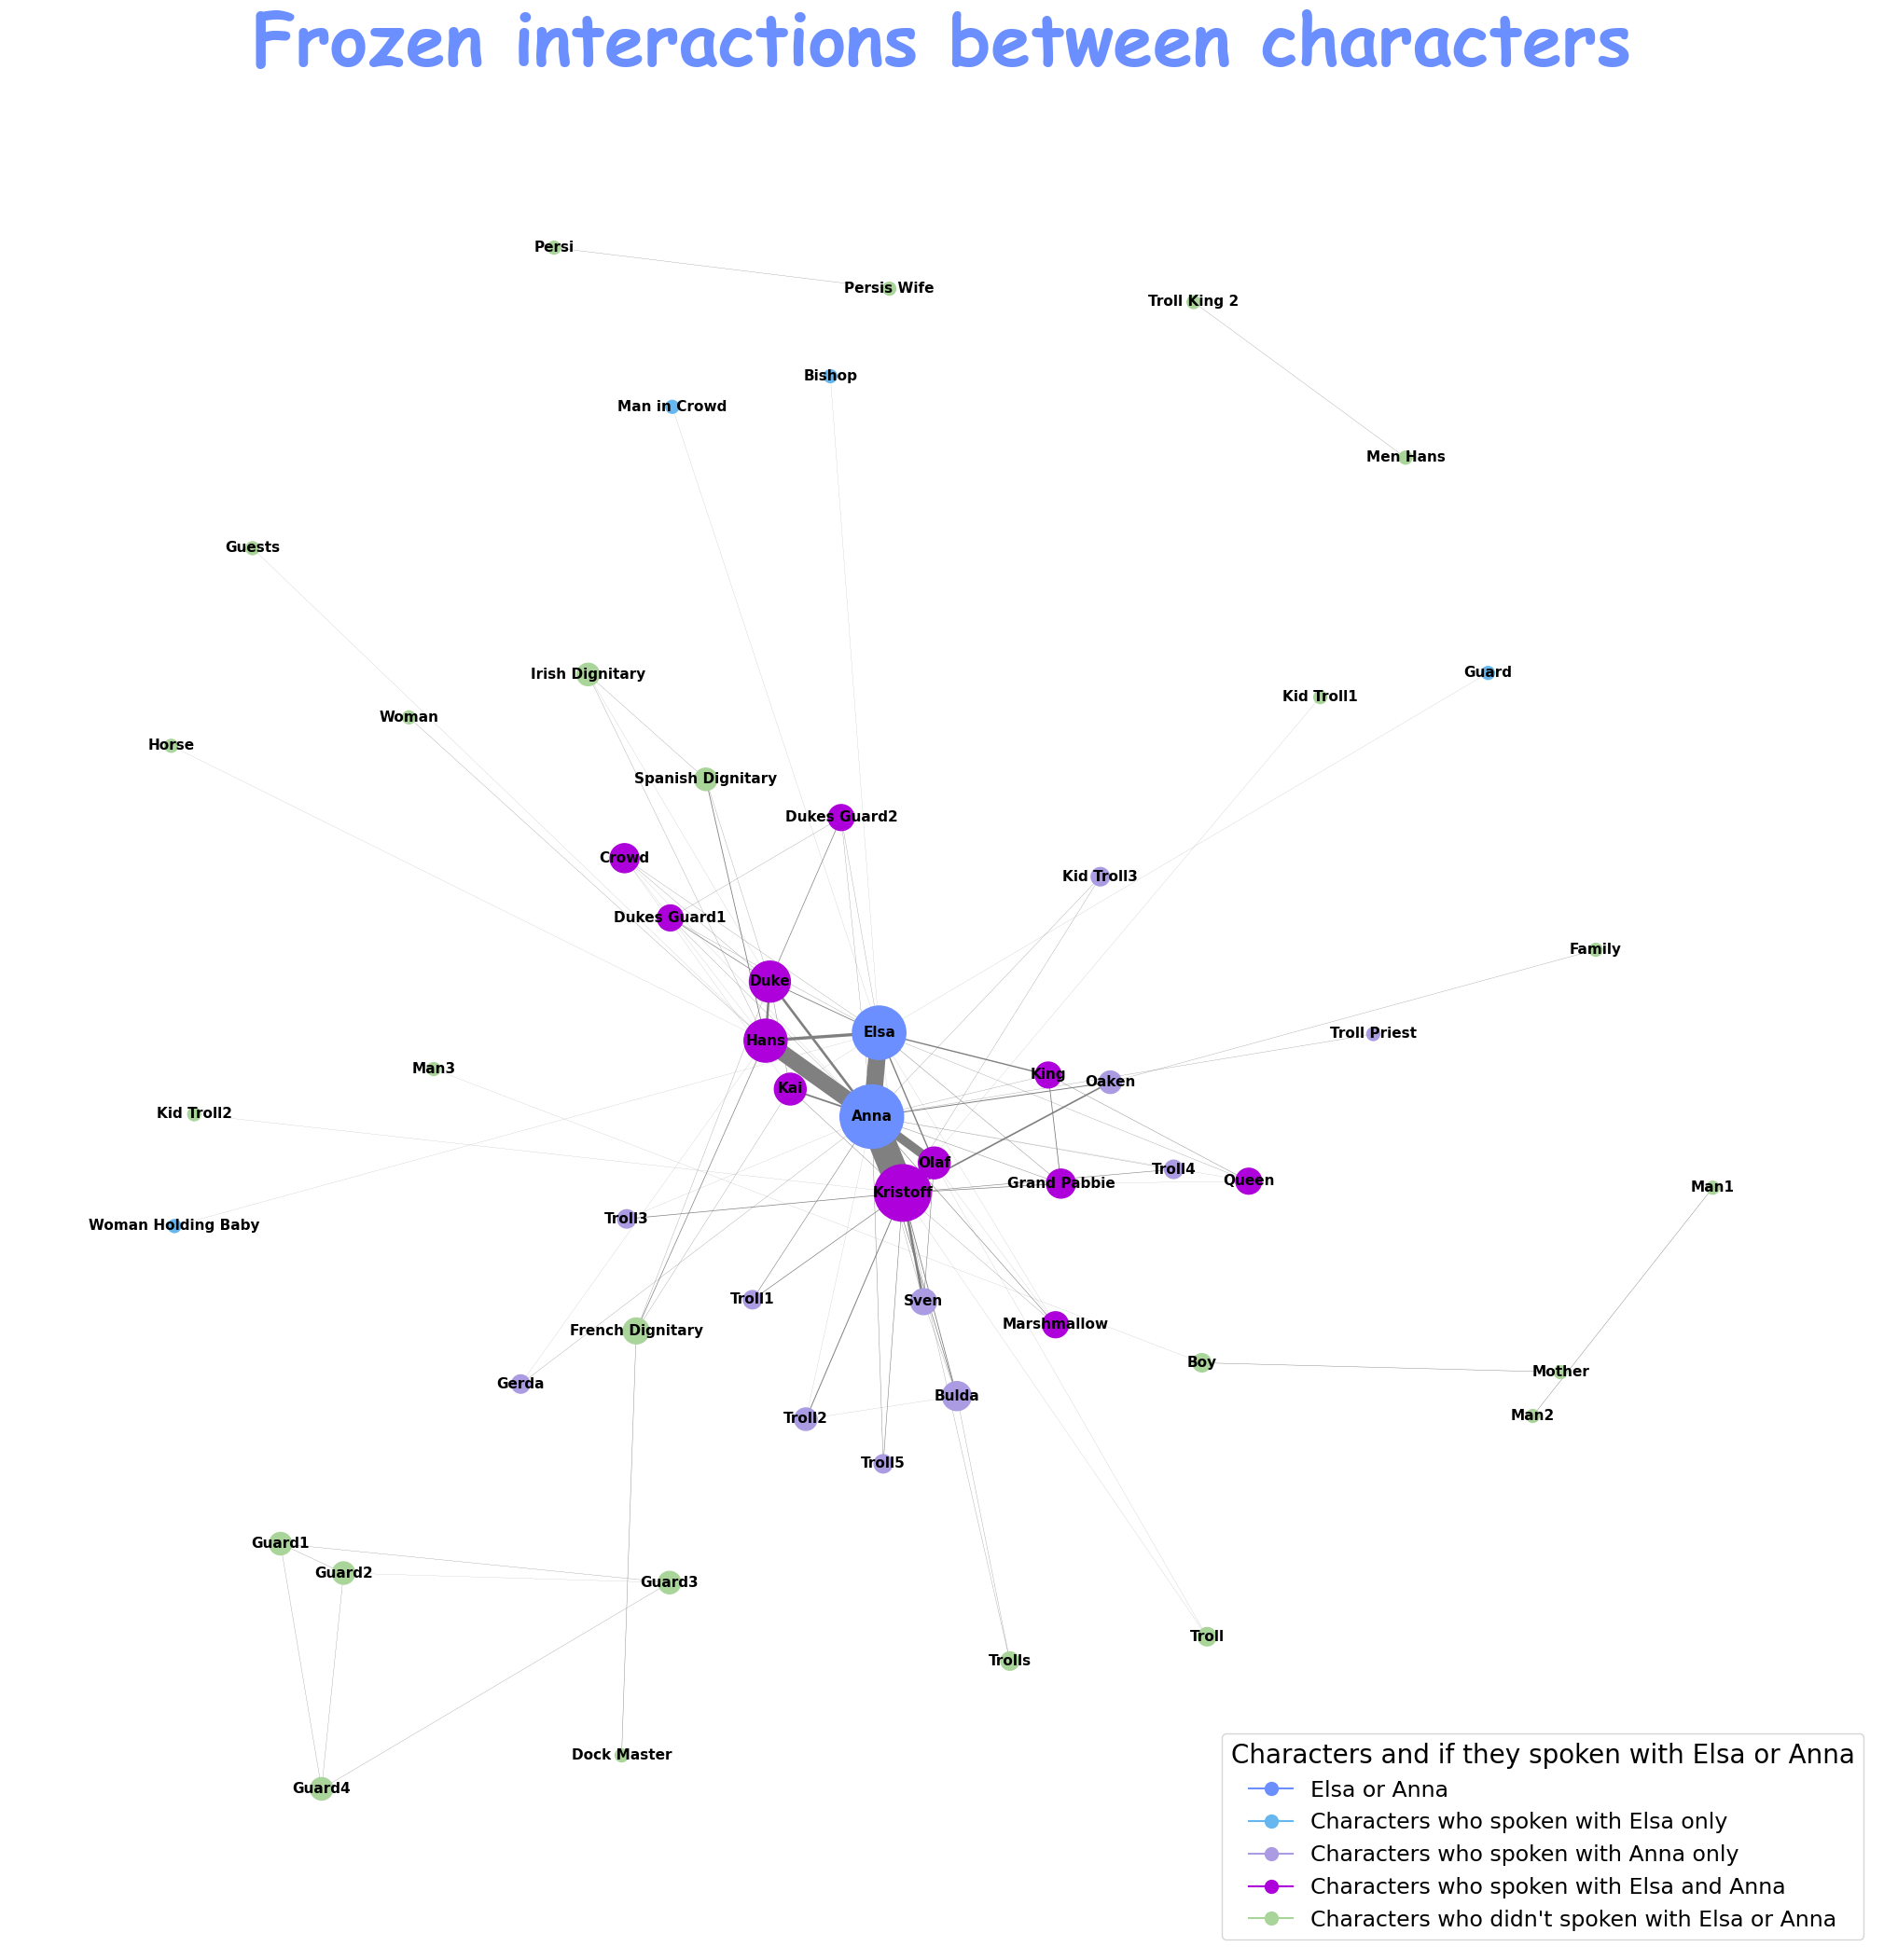

In [6]:

node_colors = []
for node in G.nodes:
    if node == 'Elsa' or node == 'Anna':
        node_colors.append('#6B8FFF')
    elif node in neighbors_of_elsa:
        node_colors.append('#66B7F0')  
    elif node in neighbors_of_anna:
        node_colors.append('#AB9BE2')  
    elif node in neighbors:
        node_colors.append('#AE00DA') 
    else:
        node_colors.append('#AAD59A')

labels = {node:node.replace('_', ' ') for node in G.nodes}

import matplotlib.lines as mlines

legend_elements = [
    mlines.Line2D([], [], marker='o', color='#6B8FFF', markerfacecolor="#6B8FFF", markersize=10, label="Elsa or Anna"),
    mlines.Line2D([], [], marker='o', color='#66B7F0', markerfacecolor='#66B7F0', markersize=10, label="Characters who spoken with Elsa only"),
    mlines.Line2D([], [], marker='o', color='#AB9BE2', markerfacecolor='#AB9BE2', markersize=10, label="Characters who spoken with Anna only"),
    mlines.Line2D([], [], marker='o', color='#AE00DA', markerfacecolor='#AE00DA', markersize=10, label="Characters who spoken with Elsa and Anna"),
    mlines.Line2D([], [], marker='o', color='#AAD59A', markerfacecolor='#AAD59A', markersize=10, label="Characters who didn't spoken with Elsa or Anna")
]

pos = nx.spring_layout(G, seed=42, k = 0.7)

plt.figure(figsize=(20, 20))
nx.draw(G, pos, with_labels=True, labels = labels, node_size=node_sizes, node_color=node_colors,  font_size=11, font_weight='bold', edge_color='gray', width=edge_widths)
plt.title("Frozen interactions between characters", fontsize=55, fontweight='bold', color='#6B8FFF', fontname='Comic Sans MS' )
plt.legend(handles=legend_elements, loc='lower right', fontsize=17, title='Characters and if they spoken with Elsa or Anna', title_fontsize='20')
plt.show()
